In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

### Dataset source URL

In [6]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

### Attribute Information
|||
|-|-|
|mpg|continuous|
|cylinders|multi-valued discrete|
|displacement|continuous|
|horsepower|continuous|
|weight|continuous|
|acceleration|continuous|
|model year|multi-valued discrete|
|origin|multi-valued discrete|
|car name|string (unique for each instance)|

In [7]:
column_names = [
    'MPG',
    'Cylinders',
    'Displacement',
    'Horsepower',
    'Weight',
    'Acceleration',
    'Model Year',
    'Origin'
]

In [8]:
raw_dataset = pd.read_csv(
    url,
    names=column_names,
    na_values='?',
    comment='\t',
    sep=' ',
    skipinitialspace=True
)

In [9]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Checking if there are any NaN

In [10]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
dataset[dataset.Horsepower.isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


### Dropping rows with NaN

In [12]:
dataset.dropna(inplace=True)

In [13]:
dataset[dataset.Horsepower.isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin


In [14]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [15]:
dataset.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [16]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [17]:
print(
    sorted(dataset.Cylinders.unique()),
    sorted(dataset['Model Year'].unique()),
    sorted(dataset.Origin.unique()),
    sep='\n'
)

[3, 4, 5, 6, 8]
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[1, 2, 3]


In [18]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [19]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [20]:
dataset.rename({'1': 'USA', '2': 'Europe', '3': 'Japan'}, axis='columns', inplace=True)

In [21]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


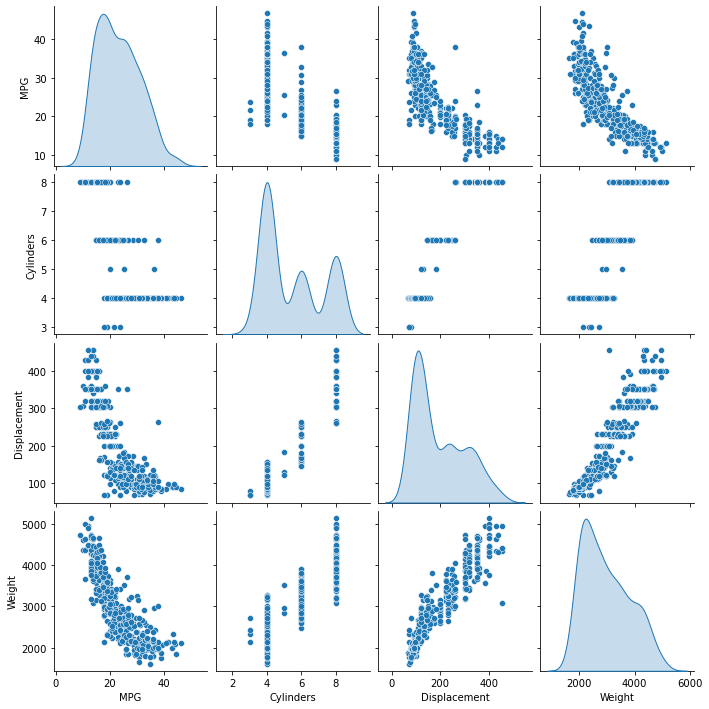

In [22]:
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [23]:
X = dataset.loc[:, dataset.columns != 'MPG']
y = dataset.loc[:, dataset.columns == 'MPG']

In [24]:
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [25]:
y.head()

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [26]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4)

In [27]:
X_test, X_validation, y_test, y_validation = train_test_split(X_, y_, test_size=0.5)

In [28]:
print(
    f'''
    X_train = {len(X_train)}, X_test = {len(y_train)},
    y_train = {len(X_test)}, y_test = {len(y_test)},
    y_validation = {len(X_validation)}, y_validation = {len(y_validation)}
    '''
)


    X_train = 235, X_test = 235,
    y_train = 78, y_test = 78,
    y_validation = 79, y_validation = 79
    


In [29]:
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
279,4,98.0,68.0,2135.0,16.6,78,0,0,1
112,4,122.0,85.0,2310.0,18.5,73,1,0,0
161,6,250.0,105.0,3897.0,18.5,75,1,0,0
163,6,225.0,95.0,3785.0,19.0,75,1,0,0


In [30]:
X_test.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
347,4,85.0,65.0,1975.0,19.4,81,0,0,1
280,6,231.0,115.0,3245.0,15.4,79,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
250,8,318.0,140.0,3735.0,13.2,78,1,0,0
342,4,135.0,84.0,2385.0,12.9,81,1,0,0


In [31]:
X_validation.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
88,8,302.0,137.0,4042.0,14.5,73,1,0,0
60,4,140.0,90.0,2408.0,19.5,72,1,0,0
96,8,360.0,175.0,3821.0,11.0,73,1,0,0
68,8,350.0,155.0,4502.0,13.5,72,1,0,0


In [32]:
y_train.head()

,MPG
1,15.0
279,29.5
112,19.0
161,16.0
163,18.0


In [33]:
y_test.head()

,MPG
347,37.0
280,21.5
2,18.0
250,19.4
342,30.0


In [34]:
y_validation.head()

,MPG
0,18.0
88,14.0
60,20.0
96,13.0
68,13.0


In [35]:
X_train.reset_index(drop=True, inplace=True)
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,350.0,165.0,3693.0,11.5,70,1,0,0
1,4,98.0,68.0,2135.0,16.6,78,0,0,1
2,4,122.0,85.0,2310.0,18.5,73,1,0,0
3,6,250.0,105.0,3897.0,18.5,75,1,0,0
4,6,225.0,95.0,3785.0,19.0,75,1,0,0


In [36]:
X_test.reset_index(drop=True, inplace=True)
X_test.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,4,85.0,65.0,1975.0,19.4,81,0,0,1
1,6,231.0,115.0,3245.0,15.4,79,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,318.0,140.0,3735.0,13.2,78,1,0,0
4,4,135.0,84.0,2385.0,12.9,81,1,0,0


In [37]:
X_validation.reset_index(drop=True, inplace=True)
X_validation.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,302.0,137.0,4042.0,14.5,73,1,0,0
2,4,140.0,90.0,2408.0,19.5,72,1,0,0
3,8,360.0,175.0,3821.0,11.0,73,1,0,0
4,8,350.0,155.0,4502.0,13.5,72,1,0,0


In [38]:
y_train.reset_index(drop=True, inplace=True)
y_train.head()

,MPG
0,15.0
1,29.5
2,19.0
3,16.0
4,18.0


In [39]:
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,MPG
0,37.0
1,21.5
2,18.0
3,19.4
4,30.0


In [40]:
y_validation.reset_index(drop=True, inplace=True)
y_validation.head()

,MPG
0,18.0
1,14.0
2,20.0
3,13.0
4,13.0


In [41]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cylinders,235.0,5.480851,1.705526,3.0,4.0,4.0,8.00,8.0
Displacement,235.0,194.334043,103.454995,68.0,105.0,146.0,264.50,455.0
Horsepower,235.0,103.119149,37.707300,46.0,75.0,90.0,125.00,225.0
Weight,235.0,2987.063830,843.374698,1613.0,2219.5,2833.0,3648.00,4997.0
Acceleration,235.0,15.737447,2.737513,9.0,14.0,15.5,17.35,24.6
Model Year,235.0,75.872340,3.636337,70.0,73.0,76.0,79.00,82.0
USA,235.0,0.646809,0.478982,0.0,0.0,1.0,1.00,1.0
Europe,235.0,0.174468,0.380322,0.0,0.0,0.0,0.00,1.0
Japan,235.0,0.178723,0.383938,0.0,0.0,0.0,0.00,1.0


### Normalization

In [42]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [43]:
normalizer.adapt(np.array(X_train))

In [44]:
print(normalizer.mean)

tf.Tensor(
[[   5.481  194.334  103.119 2987.064   15.737   75.872    0.647    0.174
     0.179]], shape=(1, 9), dtype=float32)


In [45]:
X_train.mean()

Cylinders          5.480851
Displacement     194.334043
Horsepower       103.119149
Weight          2987.063830
Acceleration      15.737447
Model Year        75.872340
USA                0.646809
Europe             0.174468
Japan              0.178723
dtype: float64

In [46]:
horsepower = np.array(X_train.Horsepower)

In [47]:
horsepower_normalizer = tf.keras.layers.Normalization(input_shape=[1, ], axis=None)

In [48]:
horsepower_normalizer.adapt(horsepower)

### Keras Sequential model

In [49]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [50]:
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [51]:
horsepower_model.predict(horsepower[:10])

array([[-1.231],
       [ 0.699],
       [ 0.36 ],
       [-0.037],
       [ 0.162],
       [-0.575],
       [-0.435],
       [ 0.162],
       [ 0.36 ],
       [-0.734]], dtype=float32)

In [52]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [53]:
%%time
history = horsepower_model.fit(
    X_train.Horsepower,
    y_train,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

Wall time: 2.27 s


In [54]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [55]:
hist.head()

,loss,val_loss,epoch
0,23.272602,22.713934,0
1,22.670940,22.145779,1
2,22.059946,21.564024,2
3,21.459011,20.982153,3
4,20.849636,20.390980,4


In [56]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [57]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    X_test.Horsepower,
    y_test,
    verbose=0
)

In [58]:
test_results

{'horsepower_model': 3.826530933380127}

In [59]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [60]:
def plot_horsepower(x, y):
    plt.scatter(X_train.Horsepower, y_train, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

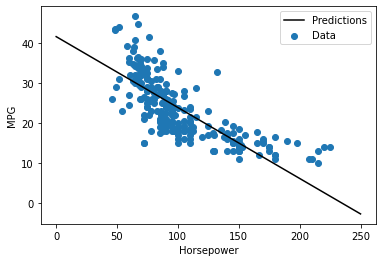

In [61]:
plot_horsepower(x, y)

### Linear regression with multiple inputs

In [62]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [63]:
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [64]:
linear_model.predict(X_train[:10])

array([[-0.526],
       [-1.142],
       [ 1.416],
       [ 1.303],
       [ 1.632],
       [-2.981],
       [-1.324],
       [ 0.209],
       [ 0.427],
       [ 0.298]], dtype=float32)

In [65]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.394],
       [-0.391],
       [-0.655],
       [ 0.236],
       [ 0.5  ],
       [-0.341],
       [ 0.369],
       [-0.169],
       [-0.501]], dtype=float32)>

In [66]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [67]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

Wall time: 2.23 s


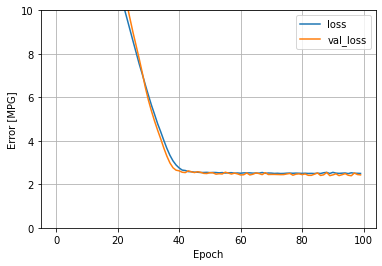

In [68]:
plot_loss(history)

In [69]:
test_results['linear_model'] = linear_model.evaluate(
    X_test, 
    y_test, 
    verbose=0
)

# Regression with a deep neural network (DNN)

In [70]:
model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [72]:
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [73]:
%%time
history = model.fit(
    X_train.Horsepower,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

Wall time: 2.36 s


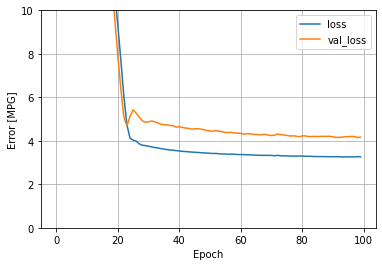

In [74]:
plot_loss(history)

In [75]:
x = tf.linspace(0.0, 250, 251)
y = model.predict(x)

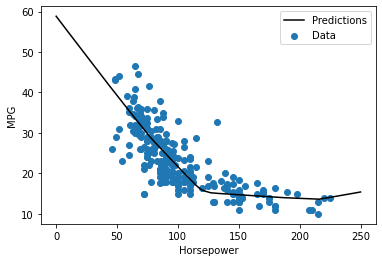

In [76]:
plot_horsepower(x, y)

### Regression using a DNN and multiple inputs

In [77]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [78]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [80]:
%%time
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

Wall time: 2.32 s


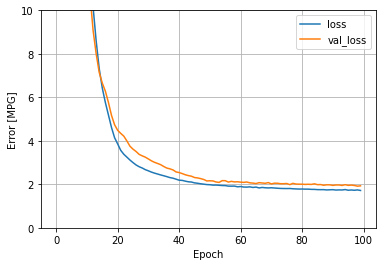

In [81]:
plot_loss(history)

In [82]:
test_results['model'] = model.evaluate(X_test, y_test, verbose=0)

In [83]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.826531
linear_model,2.625625
model,1.943187


In [84]:
test_predictions = model.predict(X_test).flatten()

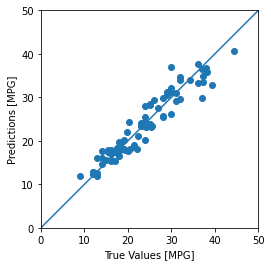

In [87]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [99]:
error = test_predictions - np.array(y_test).reshape(-1)

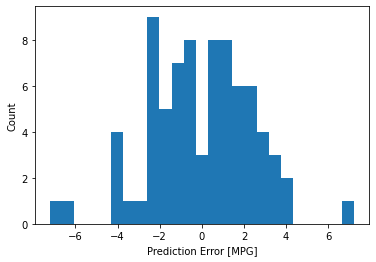

In [100]:
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [101]:
model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [102]:
reloaded = tf.keras.models.load_model('dnn_model')

In [103]:
test_results['reloaded'] = reloaded.evaluate(X_validation, y_validation, verbose=0)

In [104]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.826531
linear_model,2.625625
model,1.943187
reloaded,1.983853
